In [1]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [3]:
print(samples.shape)
X = samples.transpose()
m = np.array([[np.mean(x)] for x in X])
print("Mean:")
print(m)

(178, 13)
Mean:
[[1.30006180e+01]
 [2.33634831e+00]
 [2.36651685e+00]
 [1.94949438e+01]
 [9.97415730e+01]
 [2.29511236e+00]
 [2.02926966e+00]
 [3.61853933e-01]
 [1.59089888e+00]
 [5.05808988e+00]
 [9.57449438e-01]
 [2.61168539e+00]
 [7.46893258e+02]]


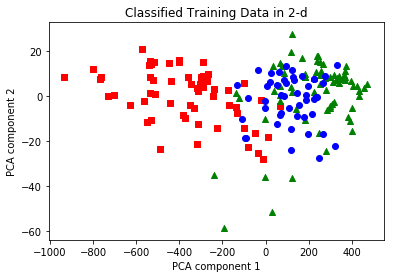

In [4]:
centered = X - m
U,sig,Vh = np.linalg.svd(centered, full_matrices=True)
centeredF = np.matmul(U[:,:2].transpose(), centered)

CF0 = []
CF1 = []
CF2 = []

for i in range(178):
    #print(train_l[i])
    if labels[i] == 0:
        CF0.append(centeredF[:,i])
    elif labels[i] == 1:
        CF1.append(centeredF[:,i])
    elif labels[i] == 2:
        CF2.append(centeredF[:,i])
        
CF0 = np.array(CF0).transpose()
CF1 = np.array(CF1).transpose()
CF2 = np.array(CF2).transpose()

fig = plt.figure()
f = fig.add_subplot(111)
f.set_title('Classified Training Data in 2-d')
f.set_xlabel('PCA component 1')
f.set_ylabel('PCA component 2')

f.scatter(CF0[0], CF0[1], color='r', marker='s')
f.scatter(CF1[0], CF1[1], color='g', marker='^')
f.scatter(CF2[0], CF2[1], color='b')

In [5]:
stdDev= np.array([[np.std(x)] for x in centered])
print("Standard Deviations:")
print(stdDev)

print(centered.shape)
normD = centered/stdDev
teststd= np.array([[np.std(x)] for x in normD])
print("Standard Deviations:")
print(teststd)

Standard Deviations:
[[8.09542915e-01]
 [1.11400363e+00]
 [2.73572294e-01]
 [3.33016976e+00]
 [1.42423077e+01]
 [6.24090564e-01]
 [9.96048950e-01]
 [1.24103260e-01]
 [5.70748849e-01]
 [2.31176466e+00]
 [2.27928607e-01]
 [7.07993265e-01]
 [3.14021657e+02]]
(13, 178)
Standard Deviations:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


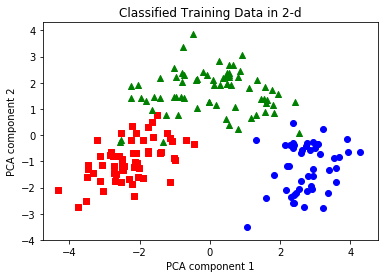

In [6]:
U,sig,Vh = np.linalg.svd(normD, full_matrices=True)
normF = np.matmul(U[:,:2].transpose(), normD)

NF0 = []
NF1 = []
NF2 = []

for i in range(178):
    #print(train_l[i])
    if labels[i] == 0:
        NF0.append(normF[:,i])
    elif labels[i] == 1:
        NF1.append(normF[:,i])
    elif labels[i] == 2:
        NF2.append(normF[:,i])
        
NF0 = np.array(NF0).transpose()
NF1 = np.array(NF1).transpose()
NF2 = np.array(NF2).transpose()

fig = plt.figure()
f = fig.add_subplot(111)
f.set_title('Classified Training Data in 2-d')
f.set_xlabel('PCA component 1')
f.set_ylabel('PCA component 2')

f.scatter(NF0[0], NF0[1], color='r', marker='s')
f.scatter(NF1[0], NF1[1], color='g', marker='^')
f.scatter(NF2[0], NF2[1], color='b')

#It seems like the PCA features corresponding to the unit variance and mean centered dataset would be better for classification.

In [7]:
def Gprob(mean, std, pt):
    return 1/(math.pow(2*math.pi, 0.5)*std)*math.exp(-math.pow(pt - mean, 2)/(2*math.pow(std,2)))

#assuming 2d features and 3 classes
def trainGNB(DandLappended):
    #seperate into the 3 classes
    class0 = []
    class1 = []
    class2 = []
    for d in DandLappended:
        if d[-1]==0:
            class0.append(d)
        elif d[-1]==1:
            class1.append(d)
        elif d[-1]==2:
            class2.append(d)
    
    class0,class1,class2=np.array(class0).transpose(), np.array(class1).transpose(), np.array(class2).transpose()
    #print(class0)
    U0,_,_ = np.linalg.svd(class0, full_matrices=True)
    F0 = np.matmul(U0[:,:2].transpose(), class0)
    U1,_,_ = np.linalg.svd(class1, full_matrices=True)
    F1 = np.matmul(U1[:,:2].transpose(), class1)
    U2,_,_ = np.linalg.svd(class2, full_matrices=True)
    F2 = np.matmul(U2[:,:2].transpose(), class2)
    return F0, F1, F2
    #return {'meanx': np.mean(class0[0,:]), 'meany':np.mean(class0[1,:]), 'stdx': np.std(class0[0,:]), 'stdy': np.std(class0[1,:])},\
#{'meanx': np.mean(class1[0,:]), 'meany':np.mean(class1[1,:]), 'stdx': np.std(class1[0,:]), 'stdy': np.std(class1[1,:])},\
#{'meanx': np.mean(class2[0,:]), 'meany':np.mean(class2[1,:]), 'stdx': np.std(class2[0,:]), 'stdy': np.std(class2[1,:])}

def predictGNB(feat0, feat1, feat2, pt):
    mean0x = np.mean(feat0[0,:])
    mean0y = np.mean(feat0[1,:])
    std0x = np.std(feat0[0,:])
    std0y = np.std(feat0[1,:])
    
    mean1x = np.mean(feat1[0,:])
    mean1y = np.mean(feat1[1,:])
    std1x = np.std(feat1[0,:])
    std1y = np.std(feat1[1,:])
    
    mean2x = np.mean(feat2[0,:])
    mean2y = np.mean(feat2[1,:])
    std2x = np.std(feat2[0,:])
    std2y = np.std(feat2[1,:])
    
    predC = []
    
    for p in pt:
        p0 = Gprob(mean0x, std0x, p[0])*Gprob(mean0y,std0y,p[1])
        p1 = Gprob(mean1x, std1x, p[0])*Gprob(mean1y,std1y,p[1])
        p2 = Gprob(mean2x, std2x, p[0])*Gprob(mean2y,std2y,p[1])
        probs = [p0,p1,p2]
        print(probs)
        predC.append(probs.index(max(probs)))
    return predC

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:

#aS = np.concatenate((X, labels[None,:]), axis=0)
aS = np.concatenate((normD, labels[None,:]), axis=0)
print(aS.shape)
#aC = np.concatenate((X, labels[None,:]), axis=0)
aC = np.concatenate((centered, labels[None,:]), axis=0)
print(aC.shape)

(14, 178)
(14, 178)


In [10]:
aStd = aS.transpose()
aCent =  aC.transpose()

perm = np.random.permutation(aStd.shape[0])

asp1,asp2,asp3,asp4,asp5, _ = np.array(np.split(aStd[perm],[36, 72, 108, 144, 178]))
print(asp1.shape, asp2.shape, asp3.shape, asp4.shape, asp5.shape)
print(asp1[:,13])

acp1,acp2,acp3,acp4,acp5, _ = np.array(np.split(aCent[perm],[36, 72, 108, 144, 178]))
print(acp1.shape, acp2.shape, acp3.shape, acp4.shape, acp5.shape)
print(acp1[:,13])

NameError: name 'aD' is not defined

In [ ]:

GNB = GaussianNB()
#for i in range(5):
    


GNB.fit(normF.transpose(), labels)
GNB.predict(normF.transpose()) - labels

In [ ]:
a,b,c = trainGNB(asp1)
_ = predictGNB(a,b,c,np.array([[1,4]]))
U,_,_ = np.linalg.svd(asp4.transpose(),full_matrices=True)
testfeat = np.matmul(U[:,:2].transpose(), asp4.transpose())
g = predictGNB(a,b,c,testfeat.transpose())
print(g)
print(asp4[:,-1])
print(g-asp4[:,-1])